In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import pandas as pd

df = pd.read_csv('atividade3_dataset.csv', sep=';')
df

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023
...,...,...,...,...,...,...,...,...
505,395,Bruno,46.0,CURITIBA,Headset,3321.2,2,24-08-2023
506,378,Mariana,62.0,MANAUS,Tablet,3282.26,3,19-05-2025
507,125,João,24.0,MANAUS,Headset,4529.67,5,19-02-2025
508,69,João,25.0,BELO HORIZONTE,Headset,31440.9,8,01-02-2024


In [10]:
buf = []
print(df.info())
print("\nValores ausentes:")
print(df.isna().sum())
print("\nValores duplicados:")
print(df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB
None

Valores ausentes:
ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64

Valores duplicados:
8


In [11]:
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')

median_idade = df['Idade'].median()
df['Idade'].fillna(median_idade, inplace=True)

median_preco = df['Preço'].median()
df['Preço'].fillna(median_preco, inplace=True)

preco = df['Preço'].astype(np.int64)

print("Nulos apos tratamento:\n")
print(df.isna().sum())

Nulos apos tratamento:

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64


/tmp/ipykernel_13484/110773238.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(median_idade, inplace=True)
/tmp/ipykernel_13484/110773238.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [12]:
print("Duplicados (linhas) antes da remoção:")
print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

print("Duplicados (linhas) após a remoção:")
print(df.duplicated().sum())

Duplicados (linhas) antes da remoção:
8
Duplicados (linhas) após a remoção:
0


In [ ]:
df['Preço'] = pd.to_numeric(df['Preço'], errors='coerce')

df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], dayfirst=True, errors='coerce')



In [16]:
df['Cidade'] = df['Cidade'].str.strip().str.upper()
df['Cidade'].replace({
    "SP": "SÃO PAULO",
    "RIO": "RIO DE JANEIRO"
}, inplace=True)


/tmp/ipykernel_13484/1446298980.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cidade'].replace({


In [20]:
print(df['Idade'].describe())
print(df['Preço'].describe())
print(df['Quantidade'].describe())


count    502.000000
mean      44.306773
std       15.028300
min       18.000000
25%       32.000000
50%       44.000000
75%       57.000000
max       70.000000
Name: Idade, dtype: float64
count      502.000000
mean      3103.775976
std       3642.503495
min        509.890000
25%       1824.685000
50%       2828.080000
75%       3661.232500
max      47611.600000
Name: Preço, dtype: float64
count    502.000000
mean       5.754980
std        2.861006
min        1.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       10.000000
Name: Quantidade, dtype: float64


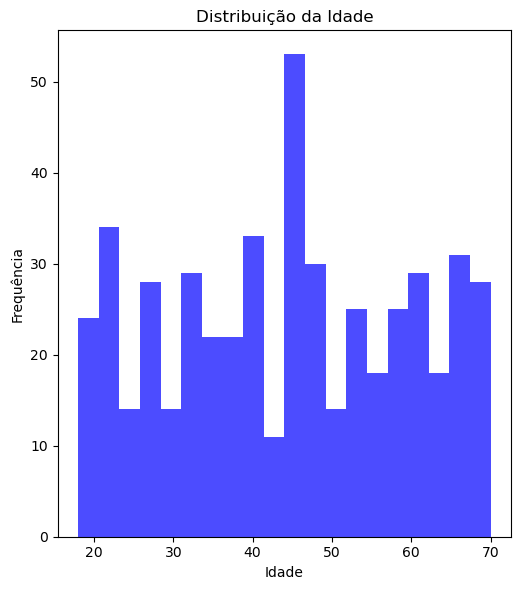

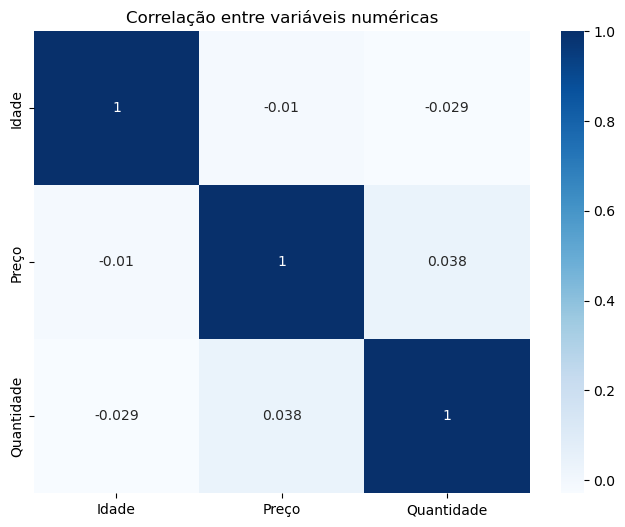

In [18]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Idade'], bins=20, color='blue', alpha=0.7)
plt.title('Distribuição da Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df[['Idade','Preço','Quantidade']].corr(), annot=True, cmap="Blues")
plt.title("Correlação entre variáveis numéricas")
plt.show()


In [19]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 502 entries, 0 to 508
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           502 non-null    int64         
 1   Nome         502 non-null    object        
 2   Idade        502 non-null    float64       
 3   Cidade       502 non-null    object        
 4   Produto      502 non-null    object        
 5   Preço        502 non-null    float64       
 6   Quantidade   502 non-null    int64         
 7   Data_Compra  502 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 35.3+ KB
